In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk

In [2]:
first_doc = pd.read_excel(r"C:\Users\alnair\Desktop\2022_02_21_TADC_benchmarking_highconc\20220221_TADC_benchmarking_higher_conc_01.xlsx")
second_doc = pd.read_excel(r"C:\Users\alnair\Desktop\2022_02_21_TADC_benchmarking_highconc\20220221_TADC_benchmarking_higher_conc_02.xlsx")
third_doc = pd.read_excel(r"C:\Users\alnair\Desktop\2022_02_21_TADC_benchmarking_highconc\20220221_TADC_benchmarking_higher_conc_03.xlsx")

In [3]:
#this really could be improved
# aim: renaming columns to letter+number format from FLUOstar
def column_rename(df):
    for i in range(1,97):
        letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
        if int(i%12) == 0:
            letter = letters[int(i/12)-1]
            number = 12
        else:
            letter = letters[int(i/12)]
            number = i%12
    
        df.columns.values[i] = letter + str(number)   
    
    return df

In [4]:
def row_numbers(df):
    row_number = len(df.index)
    df.index = range(1, row_number + 1)
    return df

In [5]:
# preprocessing of datasets: dropping top rows and naming TIME column.
def preprocessing(df):
    df = df.drop([0,1,2,3,4,5,6], axis=0)
    df = df.drop(columns=['User: USER'])
    df = df.rename({'Unnamed: 1': 'Time'}, axis=1) 
    df = column_rename(df)
    df = df.astype(float)
    df = row_numbers(df)
    return df

In [6]:
def time_column_update(first_df, second_df):
    current_last_time = first_df['Time'][first_df.index[-1]]
    second_df['Time'] = second_df['Time'].apply(lambda x: x + current_last_time)
    return second_df

In [7]:
first_doc = preprocessing(first_doc)
second_doc = preprocessing(second_doc)
third_doc = preprocessing(third_doc)

In [8]:
second_doc = time_column_update(first_doc, second_doc)
print(second_doc)
third_doc = time_column_update(second_doc, third_doc)
print(third_doc)

          Time     A1     A2     A3     A4     A5     A6     A7     A8     A9  \
1    24.777778  112.0  114.0  118.0  115.0  109.0  116.0  114.0  112.0  113.0   
2    24.888889  113.0  117.0  119.0  115.0  110.0  118.0  117.0  112.0  112.0   
3    25.000000  112.0  116.0  118.0  117.0  111.0  118.0  115.0  112.0  111.0   
4    25.111111  112.0  115.0  120.0  116.0  111.0  118.0  116.0  113.0  113.0   
5    25.222222  112.0  114.0  117.0  114.0  109.0  117.0  116.0  112.0  112.0   
..         ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
227  49.888889  111.0  115.0  117.0  108.0  106.0  107.0  106.0  102.0  102.0   
228  50.000000  111.0  115.0  117.0  108.0  106.0  106.0  108.0  102.0  102.0   
229  50.111111  110.0  114.0  119.0  107.0  107.0  108.0  107.0  101.0  102.0   
230  50.222222  109.0  114.0  118.0  108.0  106.0  107.0  106.0  102.0  102.0   
231  50.333333  111.0  115.0  119.0  107.0  106.0  107.0  105.0  102.0  101.0   

     ...     H3     H4     

In [9]:
all_docs = [first_doc, second_doc, third_doc]

In [10]:
full_doc = pd.concat(all_docs)

In [11]:
full_doc

,Time,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
1,0.000000,116.0,120.0,124.0,119.0,119.0,120.0,119.0,119.0,120.0,...,115.0,115.0,117.0,116.0,129.0,117.0,115.0,118.0,118.0,116.0
2,0.111111,114.0,118.0,120.0,117.0,120.0,120.0,119.0,121.0,120.0,...,114.0,115.0,117.0,117.0,129.0,118.0,116.0,115.0,116.0,115.0
3,0.222222,114.0,117.0,121.0,119.0,118.0,120.0,121.0,121.0,119.0,...,112.0,113.0,116.0,117.0,129.0,118.0,116.0,115.0,115.0,114.0
4,0.333333,112.0,118.0,120.0,118.0,117.0,118.0,119.0,119.0,120.0,...,111.0,113.0,115.0,115.0,128.0,117.0,114.0,115.0,115.0,114.0
5,0.444444,113.0,118.0,120.0,116.0,118.0,118.0,119.0,118.0,119.0,...,111.0,111.0,114.0,116.0,127.0,117.0,112.0,113.0,114.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,71.333333,108.0,111.0,115.0,109.0,107.0,106.0,107.0,101.0,98.0,...,109.0,110.0,113.0,112.0,121.0,106.0,104.0,107.0,105.0,108.0
191,71.444444,107.0,111.0,115.0,109.0,107.0,107.0,107.0,102.0,99.0,...,110.0,112.0,111.0,112.0,122.0,108.0,105.0,107.0,105.0,110.0
192,71.555556,108.0,111.0,115.0,108.0,107.0,107.0,106.0,102.0,98.0,...,111.0,111.0,113.0,112.0,121.0,107.0,105.0,108.0,106.0,109.0
193,71.666667,107.0,110.0,116.0,108.0,106.0,108.0,105.0,103.0,99.0,...,110.0,110.0,111.0,112.0,122.0,108.0,105.0,107.0,106.0,109.0


In [12]:
def choose_groups():
    columns_string = input("Write the name of the columns that belong to this group as the cell name (ex. B2 B3 B4), separated by spaces: ")
    columns_list = columns_string.split(" ")
    return columns_list

In [13]:
# this needs optimization but works
def create_groups():
    conditions_groups = {}
    entering_groups_active = True
   
    while entering_groups_active:
        group_name = input("Write a name for this group of columns: ")
        columns_list = choose_groups()
        conditions_groups[group_name] = columns_list
        new_group = input("Would you like to add another group? (y/n) ").lower()
        if new_group == 'y' or new_group == 'yes':
            entering_groups_active = True
        elif new_group == 'n' or new_group == 'no':
            entering_groups_active = False
        else:
            print("You must write 'y' (without ticks) if you want to add another group, and 'n' (without ticks) if you do not wish to do so")
            new_group = input("Would you like to add another group? (y/n) ")
            if new_group == 'y' or new_group == 'yes':
                entering_groups_active = True
            elif new_group == 'n' or new_group == 'no':
                entering_groups_active = False

    
    return conditions_groups

In [14]:
conditions_groups = create_groups()

Write a name for this group of columns:  15y
Write the name of the columns that belong to this group as the cell name (ex. B2 B3 B4), separated by spaces:  b2 b3 b4
Would you like to add another group? (y/n)  


You must write 'y' (without ticks) if you want to add another group, and 'n' (without ticks) if you do not wish to do so


Would you like to add another group? (y/n)  y
Write a name for this group of columns:  20u
Write the name of the columns that belong to this group as the cell name (ex. B2 B3 B4), separated by spaces:  b5 b6 b7
Would you like to add another group? (y/n)  y
Write a name for this group of columns:  25
Write the name of the columns that belong to this group as the cell name (ex. B2 B3 B4), separated by spaces:  b8 b9 b10
Would you like to add another group? (y/n)  y
Write a name for this group of columns:  30u
Write the name of the columns that belong to this group as the cell name (ex. B2 B3 B4), separated by spaces:  c2 c3 c4
Would you like to add another group? (y/n)  n


In [15]:
def get_wells_to_keep(conditions_groups):
    chosen_wells = []
    
    for conditions in conditions_groups.values():
        for i in range(len(conditions)):
            chosen_wells.append(conditions[i].upper())
            
    return chosen_wells

In [16]:
wells_to_keep = get_wells_to_keep(conditions_groups)

In [17]:
def drop_unused_wells(df, wells_list):
    columns_df = list(df.columns)
    
    for well in columns_df[1:]:
        if str(well) not in wells_list:
            del df[well]
    
    return df

In [18]:
full_doc = drop_unused_wells(full_doc, wells_to_keep)

In [19]:
def create_first_plots():
    
    full_plots_dic = {}
    axs_dic = {}
    time_col = full_doc['Time']
    fluorophore = input('Which fluorophore was used? ')
        
    for group in conditions_groups.keys():
        first = conditions_groups.get(group)[0].upper()
        second = conditions_groups.get(group)[1].upper()
        third = conditions_groups.get(group)[2].upper()
        full_plots_dic[group + '_plot'] = plt.plot(time_col, full_doc[first], time_col, full_doc[second], time_col, full_doc[third], label=group)
        plt.xlabel('Time')
        plt.ylabel(fluorophore + ' intensity (arb. units)')
        plt.title(str(group))
        full_plots_fig = plt.figure(tight_layout=True)
        
    return full_plots_dic

Which fluorophore was used?  x34


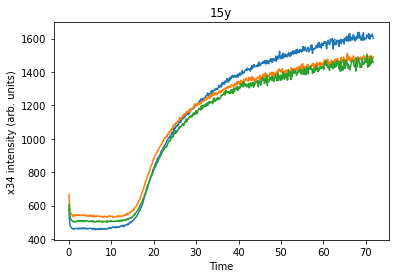

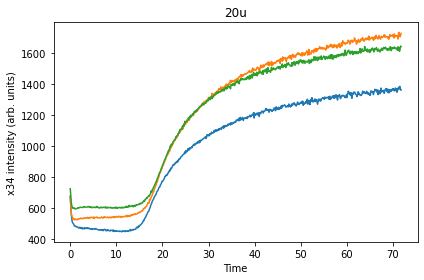

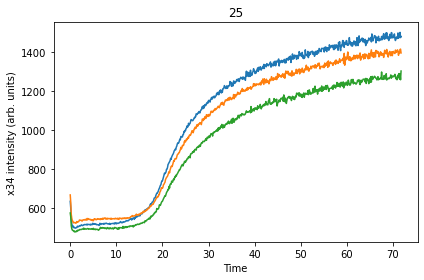

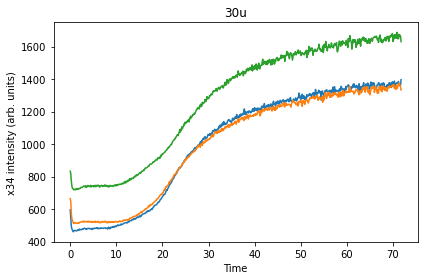

<Figure size 432x288 with 0 Axes>

In [20]:
first_plots = create_first_plots()

In [21]:
def deleting_wells():
    
    delete_answer = input("do you want to delete any well? y/n ")
    if delete_answer == 'y' or delete_answer == 'yes':
        wells_to_del = input('which wells? write them separated by a space ')
        wells_to_del_list = wells_to_del.split(" ")
        
        for well in wells_to_del_list:
            if well in wells_to_keep:
                wells_to_keep.remove(well)
    
    return wells_to_keep

In [22]:
full_doc

,Time,B2,B3,B4,B5,B6,B7,B8,B9,B10,C2,C3,C4
1,0.000000,583.0,665.0,607.0,679.0,674.0,726.0,633.0,666.0,573.0,595.0,664.0,833.0
2,0.111111,524.0,625.0,580.0,624.0,620.0,686.0,598.0,627.0,553.0,542.0,647.0,818.0
3,0.222222,490.0,580.0,544.0,562.0,574.0,635.0,543.0,566.0,507.0,498.0,580.0,777.0
4,0.333333,476.0,567.0,527.0,533.0,553.0,618.0,518.0,546.0,492.0,479.0,544.0,747.0
5,0.444444,474.0,552.0,517.0,511.0,542.0,607.0,503.0,534.0,485.0,473.0,531.0,730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,71.333333,1614.0,1495.0,1453.0,1379.0,1734.0,1635.0,1492.0,1403.0,1291.0,1361.0,1365.0,1661.0
191,71.444444,1620.0,1476.0,1482.0,1385.0,1718.0,1612.0,1477.0,1396.0,1263.0,1365.0,1372.0,1674.0
192,71.555556,1626.0,1481.0,1473.0,1385.0,1705.0,1626.0,1503.0,1415.0,1289.0,1365.0,1357.0,1663.0
193,71.666667,1608.0,1481.0,1464.0,1362.0,1713.0,1646.0,1476.0,1417.0,1259.0,1362.0,1349.0,1663.0


In [24]:
wells_to_keep = deleting_wells()
full_doc = drop_unused_wells(full_doc, wells_to_keep)

do you want to delete any well? y/n  n


In [25]:
#TODO!: need to change rolling number to variable so that it accepts different # columns in group

def averages_df_gen(df):
    
    averages_df = df.rolling(3, axis=1).mean()
    columns_to_keep =[]
    
    for group in conditions_groups.keys():
        columns_to_keep.append(conditions_groups.get(group)[-1].upper())
        
    columns_df = list(averages_df.columns)
    
    for well in columns_df[1:]:
        if str(well) not in columns_to_keep:
            del averages_df[well]
    
    averages_df['Time'] = df['Time']
        
    return averages_df

In [26]:
averages_df = averages_df_gen(full_doc)

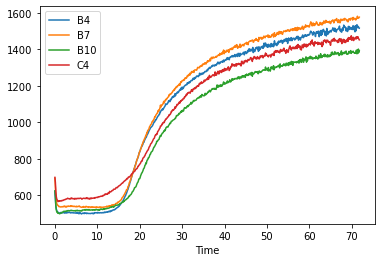

In [27]:
average_plot = averages_df.set_index('Time').plot()

In [28]:
def stdev_df_gen(df):
    
    stdev_df = df.rolling(3, axis=1).std()
    columns_to_keep =[]
    
    for group in conditions_groups.keys():
        columns_to_keep.append(conditions_groups.get(group)[-1].upper())
        
    columns_df = list(stdev_df.columns)
    
    for well in columns_df[1:]:
        if str(well) not in columns_to_keep:
            del stdev_df[well]
    
    stdev_df['Time'] = df['Time']
        
    return stdev_df

In [29]:
stdev_df = stdev_df_gen(full_doc)

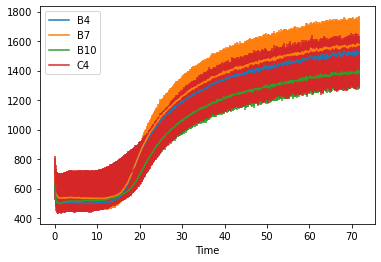

In [30]:
average_plot_sd = averages_df.set_index('Time').plot(yerr=stdev_df.set_index('Time'))

In [31]:
def merge_ave_std(ave_df, std_df):
    ini_col = len(conditions_groups) + 1
    num = 1
    
    for i in range(1, ini_col):
        if i == 1:
            ave_col = ave_df.columns[i]
            std_col = std_df.columns[i]
            if ave_col == std_col:
                ave_df.insert(i + 1, (std_df.columns[i] + '_std'), std_df[std_df.columns[i]])
        else:
            ave_col = ave_df.columns[i + num]
            std_col = std_df.columns[i]
            if ave_col == std_col:
                ave_df.insert(i*2, (std_df.columns[i] + '_std'), std_df[std_df.columns[i]])
                num += 1
    
    return ave_df

In [32]:
averages_std_df = merge_ave_std(averages_df, stdev_df)

In [54]:
averages_std_df

,Time,15y,15y_std,20u,20u_std,25,25_std,30u,30u_std
0,0.000000,618.333333,42.158431,693.000000,28.687977,624.000000,47.148701,697.333333,122.451351
1,0.111111,576.333333,50.599736,643.333333,37.004504,592.666667,37.287174,669.000000,139.309009
2,0.222222,538.000000,45.299007,590.333333,39.145029,538.666667,29.737743,618.333333,143.395723
3,0.333333,523.333333,45.610671,568.000000,44.440972,518.666667,27.006172,590.000000,139.796280
4,0.444444,514.333333,39.068316,553.333333,48.993197,507.333333,24.785749,578.000000,134.792433
...,...,...,...,...,...,...,...,...,...
644,71.333333,1520.666667,83.512474,1582.666667,183.194796,1395.333333,100.719081,1462.333333,172.062004
645,71.444444,1526.000000,81.461647,1571.666667,170.124464,1378.666667,108.047829,1470.333333,176.415230
646,71.555556,1526.666667,86.118136,1572.000000,166.694331,1402.333333,107.560835,1461.666667,174.405657
647,71.666667,1517.666667,78.691380,1573.666667,186.344663,1384.000000,112.200713,1458.000000,177.654158


In [33]:
def get_norm_times(df):
    times_norm = {}
    
    for i in range(1, len(df.columns)):
        ini_time = int(input('Enter initial time for normalization of column ' + str(df.columns[i] )))
        final_time = int(input('Enter final time for normalization of column ' + str(df.columns[i] )))
        times_norm[df.columns[i]] = [0]*2
        times_norm[df.columns[i]][0] = ini_time
        times_norm[df.columns[i]][1] = final_time 
                         
    return times_norm      

In [35]:
times_norm_dic = get_norm_times(full_doc)

Enter initial time for normalization of column B2 5
Enter final time for normalization of column B2 50
Enter initial time for normalization of column B3 5
Enter final time for normalization of column B3 50
Enter initial time for normalization of column B4 5
Enter final time for normalization of column B4 50
Enter initial time for normalization of column B5 5
Enter final time for normalization of column B5 50
Enter initial time for normalization of column B6 5
Enter final time for normalization of column B6 50
Enter initial time for normalization of column B7 5
Enter final time for normalization of column B7 50
Enter initial time for normalization of column B8 5
Enter final time for normalization of column B8 50
Enter initial time for normalization of column B9 5
Enter final time for normalization of column B9 50
Enter initial time for normalization of column B10 5
Enter final time for normalization of column B10 50
Enter initial time for normalization of column C2 5
Enter final time fo

In [36]:
norm_df = full_doc.copy()
norm_df = norm_df.reset_index(drop=True)

In [37]:
def normalization(df):
    
    for i in range(0, len(df.columns) - 1):
        #look for initial and final chosen times
        column_in_dic = list(times_norm_dic.keys())[i]
        ini_time = times_norm_dic[column_in_dic][0]
        final_time = times_norm_dic[column_in_dic][1]
        
        #look for indexes that match ini and final times in Time column
        ini_index = df.loc[df['Time'] == ini_time].index[0]
        final_index = df.loc[df['Time'] == final_time].index[0]
        
        #look for max and min values in df column within range= ini_index-final_index
        max_value = df.iloc[ini_index:final_index, i+1].max()
        min_value = df.iloc[ini_index:final_index, i+1].min()
        subs_max_min  = max_value - min_value

        final_index_norm = final_index + 1
        
        #normalize each value in sample column
        for k in range(ini_index, final_index_norm):
            current_value = df.at[k, column_in_dic]
            df.at[k, column_in_dic] = (current_value - min_value)/subs_max_min
        
    #get lowest and highest times used in df
    lower_times = []
    highest_times = []
    
    for condition in list(times_norm_dic.keys()):
        lower_time = times_norm_dic[condition][0]
        highest_time = times_norm_dic[condition][1]
        lower_times.append(lower_time)
        highest_times.append(highest_time)
    
    min_time = min(lower_times)
    max_time = max(highest_times)
    min_index = df.loc[df['Time'] == min_time].index[0]
    max_index = df.loc[df['Time'] == max_time].index[0]
    last_index = len(df.index)
    min_index_updated = min_index
    max_index_updated = max_index - min_index_updated
    last_index_updated = last_index - min_index_updated + 1
    first_range = range(0, (min_index + 1))
    last_range = range(max_index_updated, (last_index_updated + 1))
    df.drop(df.iloc[0:min_index_updated].index, inplace=True)
    df.drop(df.iloc[max_index_updated:last_index_updated].index, inplace=True)

    
    return df

In [38]:
normalization(norm_df)

,Time,B2,B3,B4,B5,B6,B7,B8,B9,B10,C2,C3,C4
45,5.000000,0.008411,0.013498,0.006711,0.021505,0.003745,0.005230,0.006704,0.000000,0.014124,0.003584,0.006649,0.010664
46,5.111111,0.008411,0.007874,0.006711,0.022700,0.009363,0.006276,0.007821,0.008951,0.005650,0.002389,0.007979,0.002370
47,5.222222,0.009346,0.015748,0.008949,0.022700,0.000000,0.007322,0.010056,0.012788,0.008475,0.007168,0.010638,0.005924
48,5.333333,0.006542,0.010124,0.004474,0.019116,0.004682,0.008368,0.006704,0.007673,0.007062,0.005974,0.003989,0.011848
49,5.444444,0.005607,0.012373,0.007830,0.025090,0.005618,0.004184,0.008939,0.011509,0.004237,0.005974,0.013298,0.003555
...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,49.444444,0.964486,0.991001,0.949664,0.984468,1.000000,0.980126,0.959777,0.992327,0.995763,0.970131,0.956117,1.000000
447,49.555556,0.971963,0.986502,0.975391,0.984468,0.989700,0.972803,0.973184,0.983376,0.978814,0.967742,0.974734,0.972749
448,49.666667,1.000000,1.000000,0.967562,0.979689,0.996255,0.996862,1.000000,1.000000,1.000000,1.000000,0.994681,0.983412
449,49.777778,0.968224,0.987627,0.982103,0.990442,0.996255,0.985356,0.993296,0.966752,0.975989,0.965352,0.988032,0.988152


In [39]:
norm_averages_df = averages_df_gen(norm_df)

In [40]:
norm_stdev_df = stdev_df_gen(norm_df)

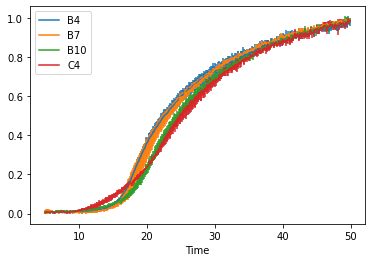

In [41]:
norm_average_plot = norm_averages_df.set_index('Time').plot(yerr=norm_stdev_df.set_index('Time'))

In [42]:
norm_ave_std_df = merge_ave_std(norm_averages_df, norm_stdev_df)

In [43]:
norm_std_ave_df = averages_df_gen(norm_stdev_df)

In [44]:
norm_ave_std_df

,Time,B4,B4_std,B7,B7_std,B10,B10_std,C4,C4_std
45,5.000000,0.009540,0.003532,0.010160,0.009853,0.006943,0.007065,0.006966,0.003550
46,5.111111,0.007666,0.000869,0.012780,0.008729,0.007474,0.001678,0.004246,0.003233
47,5.222222,0.011347,0.003816,0.010007,0.011586,0.010439,0.002182,0.007910,0.002443
48,5.333333,0.007047,0.002858,0.010722,0.007499,0.007146,0.000490,0.007270,0.004087
49,5.444444,0.008604,0.003449,0.011631,0.011678,0.008228,0.003687,0.007609,0.005073
...,...,...,...,...,...,...,...,...,...
446,49.444444,0.968384,0.020942,0.988198,0.010449,0.982622,0.019859,0.975416,0.022414
447,49.555556,0.977952,0.007600,0.982324,0.008650,0.978458,0.005105,0.971742,0.003603
448,49.666667,0.989187,0.018728,0.990935,0.009744,1.000000,0.000000,0.992698,0.008470
449,49.777778,0.979318,0.009996,0.990684,0.005454,0.978679,0.013475,0.980512,0.013129


In [45]:
def change_column_names(df):
    column_names = {}
    
    for key, value in conditions_groups.items():
        for i in range(0, len(value)):
            column_names[value[i]] = key
    
    for df_column in list(df.columns):
        for key, value in column_names.items(): 
            if df_column.lower() == key.lower():
                df.rename(columns = {df_column: value}, inplace = True)
            elif df_column.lower() == key.lower() + "_std":
                df.rename(columns = {df_column: value + '_std'}, inplace = True)
    
    return df

In [46]:
full_doc = change_column_names(full_doc)
averages_std_df = change_column_names(averages_std_df)
norm_df = change_column_names(norm_df)
norm_ave_std_df = change_column_names(norm_ave_std_df)

In [47]:
full_doc = full_doc.reset_index(drop=True)
averages_std_df = averages_std_df.reset_index(drop=True)
norm_df = norm_df.reset_index(drop=True)
norm_ave_std_df = norm_ave_std_df.reset_index(drop=True)

In [48]:
#NEXT: calculate half-times

def half_times_df(df):
    
    val = 0.5
    
    half_times = df.set_index('Time').sub(val).abs().idxmin()
    
    return half_times

In [49]:
half_times = half_times_df(norm_df)
half_times = half_times.reset_index()
half_times = half_times.rename(columns={half_times.columns[0]: 'Condition', half_times.columns[1]: 'half-times'})

In [50]:
half_times_ave = half_times.groupby(by='Condition').mean()

In [51]:
half_times_stdev = half_times.groupby(by='Condition').std()
half_times_stdev = half_times_stdev.rename(columns={half_times.columns[1]: 'half-times stdev'})

In [52]:
ht_std_column = half_times_stdev['half-times stdev']
half_times_ave_std = half_times_ave.join(ht_std_column)

In [53]:
final_doc_name = input('Name for the final Excel document: ')

with pd.ExcelWriter(final_doc_name + '.xlsx') as writer:
    full_doc.to_excel(writer, sheet_name="Full")  
    averages_std_df.to_excel(writer, sheet_name="Averages")  
    norm_df.to_excel(writer, sheet_name="Normalized")  
    norm_ave_std_df.to_excel(writer, sheet_name="Normalized (ave)")
    half_times.to_excel(writer, sheet_name="half-times")
    half_times_ave_std.to_excel(writer, sheet_name="half-times (ave)")

Name for the final Excel document:  fulldocori
